# Linear Regression - Housing Dataset

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [39]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline #to display in line

In [13]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

--2021-09-13 12:33:21--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv’

house_prices_train. 100%[===================>] 449.88K   538KB/s    in 0.8s    

2021-09-13 12:33:23 (538 KB/s) - ‘house_prices_train.csv’ saved [460676/460676]



In [15]:
train = pd.read_csv('house_prices_train.csv')

In [16]:
train.head() #shows first 5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
train.info() #shows the complete info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
 train.describe() #some data of each of the columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


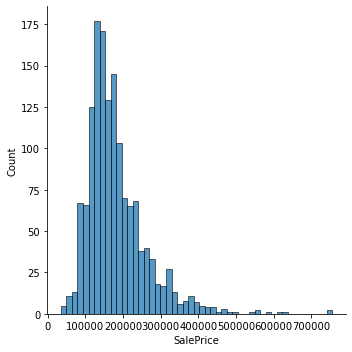

In [27]:
sns.displot(train['SalePrice'],kind="hist")#distribution plot of column


<AxesSubplot:xlabel='SalePrice'>

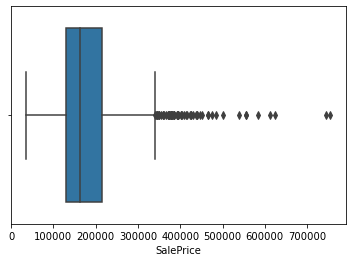

In [31]:
sns.boxplot(x=train['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

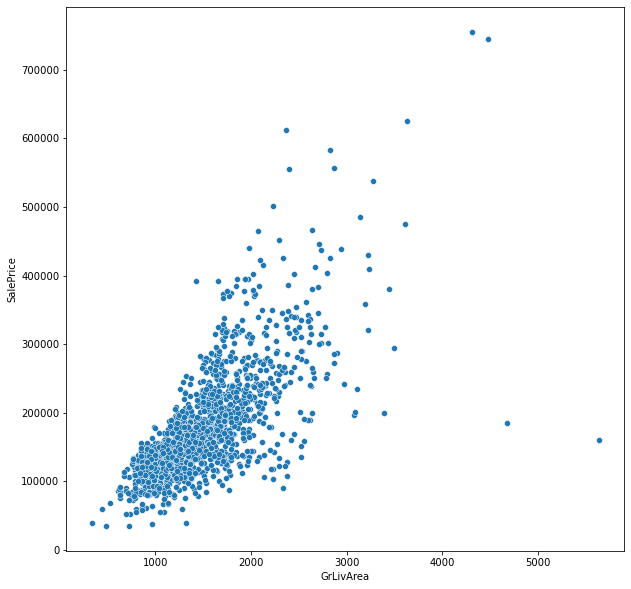

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=train['SalePrice'],x=train['GrLivArea']) #scatter plot

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

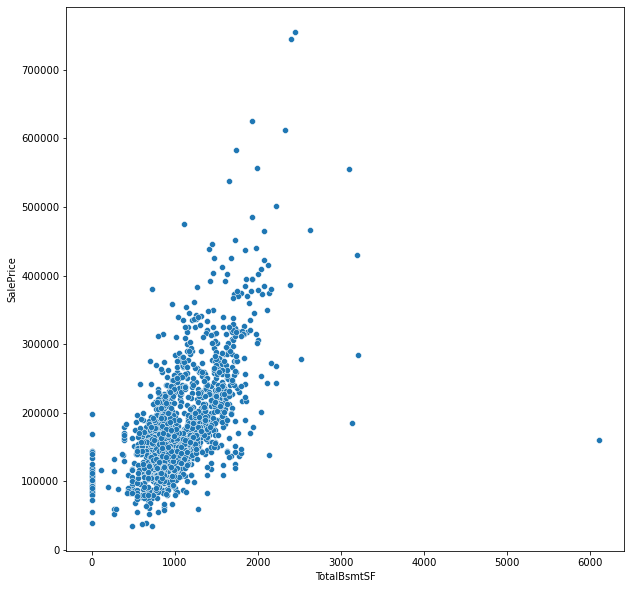

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=train['SalePrice'],x=train['TotalBsmtSF']) #scatter plot

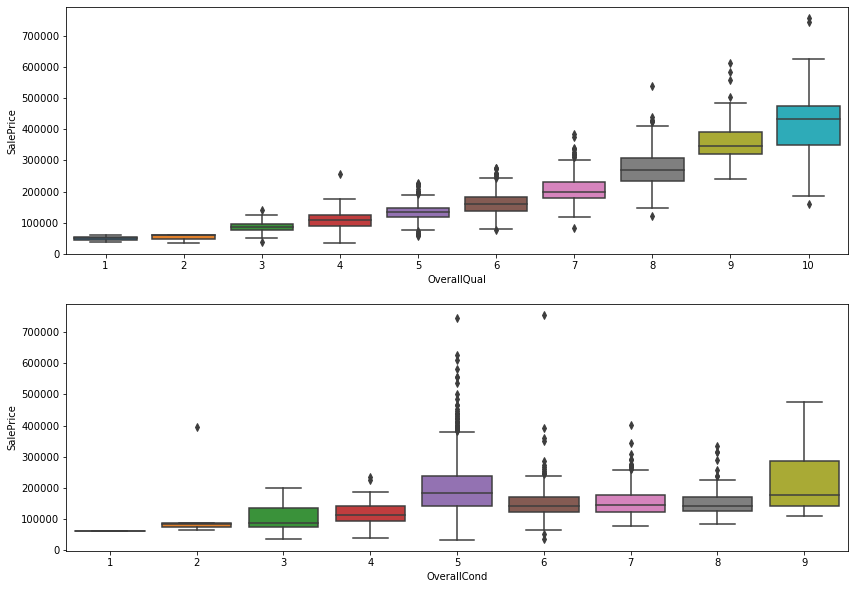

In [64]:
f,a= plt.subplots(nrows=2,figsize=(14,10))
sns.boxplot(ax = a[0],y=train['SalePrice'],x=train['OverallQual']) 
a[1]= sns.boxplot(y=train['SalePrice'],x=train['OverallCond'])#box plot 
#some interesting things https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

In [65]:
#here .corr will be used. what that is? https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

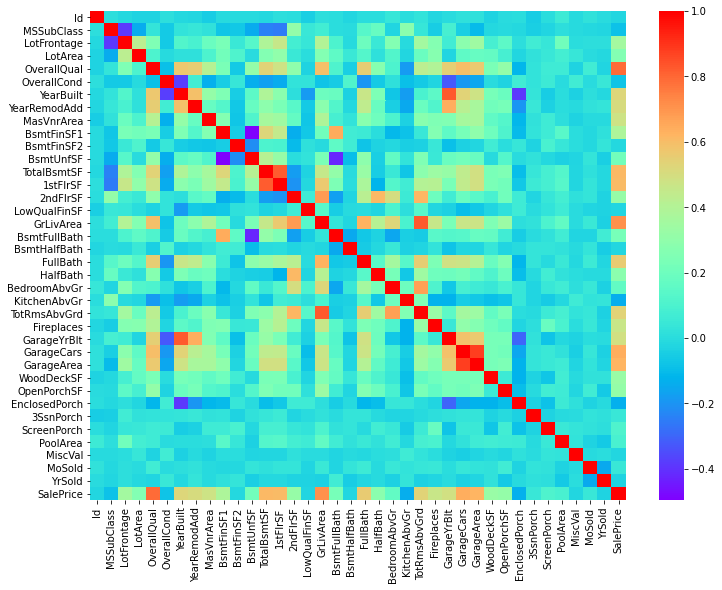

In [69]:
plt.figure(figsize=(12, 9))
sns.heatmap(data=train.corr(),cmap="rainbow")

In [70]:
corrl = train.corr()

In [71]:
corrl


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [74]:
corrl.nlargest(6,'SalePrice') #this is checking the top 6 rows in descenfing order of column salesprice inturn 
# giving the top 6 correlated items with Saleprce

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


In [75]:
corrl.nlargest(8,'SalePrice') #this is checking the top 6 rows in descenfing order of column salesprice inturn 
# giving the top 6 correlated items with Saleprce

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664


In [79]:
corrl.nlargest(8,'SalePrice')['SalePrice'] #gives series of top 8 colums

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64

In [83]:
corrl.nlargest(8,'SalePrice')['SalePrice'].index #gives a list of all required colums

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath'],
      dtype='object')

<AxesSubplot:>

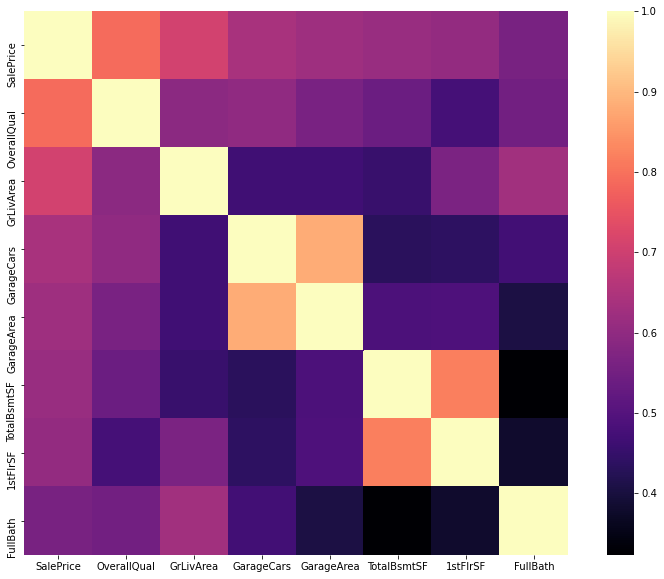

In [98]:
plt.figure(figsize=(14,10))
sns.heatmap(data=train[corrl.nlargest(8,'SalePrice')['SalePrice'].index].corr(),cmap='magma',square=True)

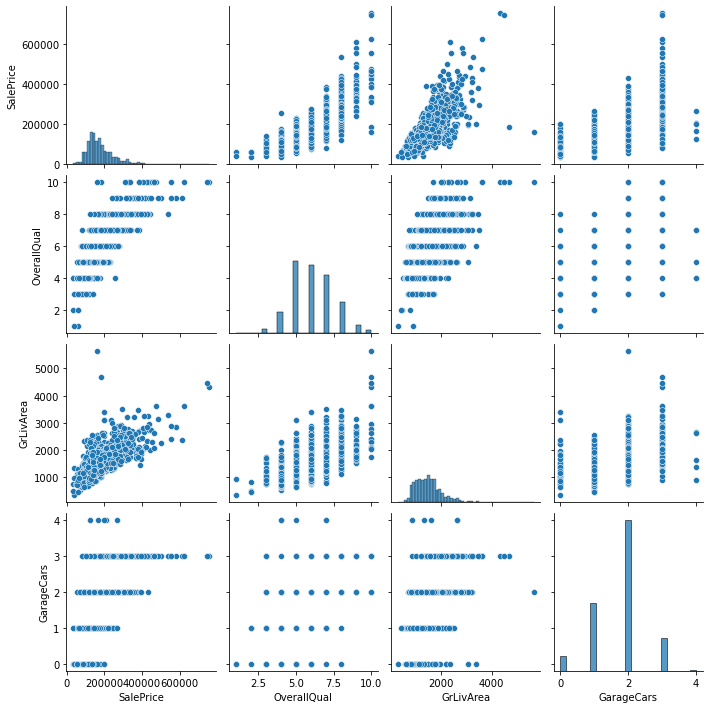

In [101]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(train[cols]);

In [124]:
t =train.isnull().sum().sort_values(ascending=False) #isnull gives a boolean df where true if null

In [125]:
pd.reset_option("max_rows", None) #a very nice thing https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

In [126]:
t

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [132]:
#pd.concat https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [138]:
# what is np.c_? https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly

Using only target- salesprice and GrLiving area

In [139]:
# Feature scaling how and when https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [140]:
x = train['GrLivArea']

In [141]:
x


0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [142]:
y = train['SalePrice']

In [143]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [144]:
x = (x - x.mean()) / x.std() #standardisation


In [145]:
x

0       0.370207
1      -0.482347
2       0.514836
3       0.383528
4       1.298881
          ...   
1455    0.250316
1456    1.061003
1457    1.569110
1458   -0.832502
1459   -0.493765
Name: GrLivArea, Length: 1460, dtype: float64

/home/arnavagrawal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

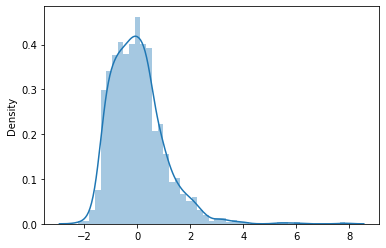

In [146]:
sns.distplot(x=x)

In [147]:
x.mean() #almost 0

-1.6071618921542934e-16

In [148]:
x.std() #almost 1

0.999999999999999

In [149]:
x.shape

(1460,)

In [150]:
x = np.c_[np.ones(x.shape[0]), x] #first array is 1460,1(imagine), second is also 1460,1 (imagine), new is 1460,2 where first array then second

In [151]:
x

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [153]:
x.shape

(1460, 2)

In [158]:
a = np.array([1,2,3]) #trying stuff

In [159]:
len(a)#trying stuff

3

In [160]:
b = np.array([4,5,6]) #trying stuff

In [163]:
(a-b)**2 #trying stuff

array([9, 9, 9])

In [162]:
a**b #trying stuff

array([  1,  32, 729])

Making the cost function J(theta)

In [170]:
x

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

4.5

In [169]:
x

array([[ 1.        ,  0.37020659],
       [ 1.        , -0.48234664],
       [ 1.        ,  0.51483616],
       ...,
       [ 1.        ,  1.56910958],
       [ 1.        , -0.83250243],
       [ 1.        , -0.49376477]])

In [171]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [172]:
#calcluting cost

In [373]:
def cost(X,y,theta):
    n = len(y)
    M = X.dot(theta) 
    sq_error = (M - y)**2
    
    return 1/(2*n) * sq_error.sum()

In [79]:
def gradient_descent (X,y,theta,learn_rate=0.01,iteration = 1000): #lr and itr have been given a default value
    m = len(y) #length of vector y = number of trainign examples
    # we will get a random theta in the function
    cost_history = np.zeros(iteration) #this will store the cost after each iteration, starts with all zeros
    theta_history = np.zeros((iteration,X.shape[1])) #each row stores the theta after one interation. x.shape[1] (number of columns in X) is the number of theta, may vary
    
    for i in range(iteration):
        
        h = X.dot(theta) # this is nothing but y= theta0 + theta1x1 + theta2x2.....
        theta = theta - (1/m)*learn_rate*X.T.dot(h-y) # refer notebook this is simply theta derivation
        theta_history[i,:] = theta.T #calls ith row and all : columns and updates theta
        cost_history[i] = cost(X,y,theta) #calss ith row and updates cost
        
    return theta, cost_history, theta_history
        

In [109]:
theta = np.random.randn(x.shape[1],1)

In [110]:
theta

array([[-0.66122375],
       [ 0.0345893 ],
       [ 1.60467016],
       [ 0.81361804]])

In [111]:
x

array([[ 1.        ,  0.6512561 ,  0.37020659,  0.31161787],
       [ 1.        , -0.07181151, -0.48234664,  0.31161787],
       [ 1.        ,  0.6512561 ,  0.51483616,  0.31161787],
       ...,
       [ 1.        ,  0.6512561 ,  1.56910958, -1.02650593],
       [ 1.        , -0.79487911, -0.83250243, -1.02650593],
       [ 1.        , -0.79487911, -0.49376477, -1.02650593]])

In [112]:
t = np.array(y).reshape(len(y),1)

In [113]:
t

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [114]:
theta, cost_history, theta_history = gradient_descent(x,t,theta,learn_rate=0.01,iteration=2000)

In [115]:
theta


array([[180921.19555322],
       [ 37478.60364086],
       [ 26631.93863167],
       [ 15921.22614698]])

In [108]:
cost_history[-1]

822817042.7398278

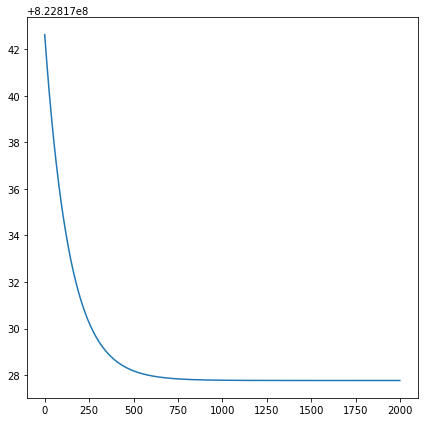

In [100]:
plt.figure(figsize=(7,7))
plt.plot(cost_history)

In [389]:
x = train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [391]:
x.shape


(1460, 4)

In [394]:
theta, cost_history, theta_history = gradient_descent(x,t,theta,learn_rate=0.01,iteration=2000)

In [395]:
theta

array([[180921.19555322],
       [ 37478.604254  ],
       [ 26631.93830568],
       [ 15921.22581327]])

In [396]:
cost_history[-1]

822817042.7360756

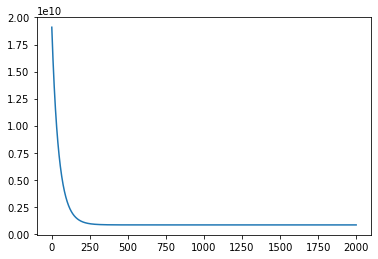

In [397]:
plt.plot(cost_history)

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXoAAAEDCAYAAAA7jc+ZAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAc4ElEQVR4nO3dfXBd9X3n8fdHV8+y/Cwbxw9gEieElECI1pDSEGg21JCkTrrpjr0ZwqbpeMhAp9md7ZRuZiDT/LHbzaYzzULqeBMPSSdA20lovK15yKRJICEQy8SAHbAtjAmqjC1s8LMtS/ruH+fIXMt6uJKu7hXnfF4zd3Tv7/zOvV8dSZ/70++eB0UEZmaWXTXVLsDMzKaWg97MLOMc9GZmGeegNzPLOAe9mVnGOejNzDJu2ga9pI2SDkjaXkLfayU9LalP0qeGLLtF0u70dsvUVWxmNj1N26AH7gVWldj3N8B/Bu4rbpQ0F7gLuApYCdwlaU75SjQzm/6mbdBHxGPAoeI2SW+X9LCkrZIel3RJ2ndvRDwLDAx5mt8DfhgRhyLideCHlP7mYWaWCbXVLmCcNgC3RsRuSVcBXwd+d5T+i4FXih53pW1mZrnxlgl6STOA3wb+UdJgc8NYqw3T5nM+mFmuvGWCnmSa6Y2IuGIc63QB1xU9XgL8pHwlmZlNf9N2jn6oiDgCvCTpDwGUuHyM1R4BbpA0J/0Q9oa0zcwsN8YMeklLJf1Y0vOSdkj602H6SNLXJHVKelbSlUXLVknamS67o9TCJN0P/AJ4l6QuSZ8DPg18TtIzwA5gddr330nqAv4Q+IakHQARcQj4MrAlvf1l2mZmlhsa6zTFkhYBiyLiaUmtwFbgExHx66I+NwF/AtxEsivj30TEVZIKwC7gIyTTKFuAtcXrmpnZ1BpzRB8R+yLi6fT+UeB5zt9zZTXwnUg8CcxO3yBWAp0RsScieoEH0r5mZlYh4/owVtJFwPuAp4YsGmk3xuHarxrhudcB6wBaWlref8kll4ynNDOzXNu6detrEdE23LKSgz7dvfF7wBfSD0bPWTzMKjFK+/mNERtI9pOnvb09Ojo6Si3NzCz3JL080rKSgl5SHUnIfzcivj9Mly5gadHjJUA3UD9Cu5mZVUgpe90I+BbwfET89QjdNgGfSfe+uRo4HBH7SD58XSFpuaR6YE3a18zMKqSUEf01wM3Ac5K2pW3/HVgGEBHrgc0ke9x0AieAz6bL+iTdTrLvegHYGBE7yvkNmJnZ6MYM+oj4GcPPtRf3CeC2EZZtJnkjMDOzKnjLHBlrZmYT46A3M8s4B72ZWcZlKui/9qPd/HRXT7XLMDObVjIV9N/46Ys85qA3MztHpoK+sa7AqTP91S7DzGxayVzQn3TQm5mdI2NBX8PpM0OvD25mlm+ZCvqmeo/ozcyGylTQN9Z6jt7MbKhMBb1H9GZm58tU0DfUFjjlOXozs3NkKuib6j11Y2Y2VLaCvq6Gk70OejOzYpkK+sa6Aqf6HPRmZsUyFfRNdQWP6M3MhshU0DfUFTjdN8DAwLDXHzczy6VMBX1TXQGA033e88bMbFApFwffKOmApO0jLP8zSdvS23ZJ/ZLmpsv2SnouXdZR7uKHaqxLvh3veWNm9qZSRvT3AqtGWhgRX4mIKyLiCuAvgJ9GxKGiLteny9snVWkJBkf0PmjKzOxNYwZ9RDwGHBqrX2otcP+kKpqExjToPaI3M3tT2eboJTWTjPy/V9QcwKOStkpaV67XGkmjR/RmZuepLeNzfRz4+ZBpm2siolvSAuCHkl5I/0M4T/pGsA5g2bJlEyrgzTl6fxhrZjaonHvdrGHItE1EdKdfDwAPAitHWjkiNkREe0S0t7W1TaiAJk/dmJmdpyxBL2kW8CHgB0VtLZJaB+8DNwDD7rlTLk316dSND5oyMztrzKkbSfcD1wHzJXUBdwF1ABGxPu32SeDRiDhetOpC4EFJg69zX0Q8XL7Sz3f2w1ifBsHM7Kwxgz4i1pbQ516S3TCL2/YAl0+0sIk4u3ulR/RmZmdl6sjYhsEPY31krJnZWZkK+rMfxnpEb2Z2VqaC3gdMmZmdL1NBX1eoobZGPmDKzKxIpoIe0ouP+IApM7OzMhn0HtGbmb0pg0Ff4zl6M7MimQv6prqCg97MrEj2gr7eUzdmZsUyF/SNtb5AuJlZscwFfVO9p27MzIplLuhbGgoc94jezOyszAV9U12tp27MzIpkLuiTEX1ftcswM5s2Mhf0TfUFTnhEb2Z2VuaCvqW+lt6+Ac70+zQIZmaQwaBvTi8n6FG9mVkig0GfXDTLH8iamSXGDHpJGyUdkDTshb0lXSfpsKRt6e3OomWrJO2U1CnpjnIWPpKWhmRE7w9kzcwSpYzo7wVWjdHn8Yi4Ir39JYCkAnAPcCNwKbBW0qWTKbYUvm6smdm5xgz6iHgMODSB514JdEbEnojoBR4AVk/gecalpSGZujl+2iN6MzMo3xz9ByQ9I+khSe9J2xYDrxT16UrbptTZD2N9GgQzMwBqy/AcTwMXRsQxSTcB/wSsADRM3xjpSSStA9YBLFu2bMLFDH4Ye+K0g97MDMowoo+IIxFxLL2/GaiTNJ9kBL+0qOsSoHuU59kQEe0R0d7W1jbhegZH9P4w1swsMemgl3SBJKX3V6bPeRDYAqyQtFxSPbAG2DTZ1xvL4By9P4w1M0uMOXUj6X7gOmC+pC7gLqAOICLWA58CPi+pDzgJrImIAPok3Q48AhSAjRGxY0q+iyIe0ZuZnWvMoI+ItWMsvxu4e4Rlm4HNEyttYhpqa6iRR/RmZoMyd2SsJJrraznuD2PNzIAMBj0k0zcnPHVjZgZkNOhbGmp9UjMzs1Qmg76pziN6M7NBmQz6lgZffMTMbFAmg76pvtYXCDczS2Uy6FvqC5z01I2ZGZDRoPfulWZmb8po0PvDWDOzQdkM+oaC5+jNzFKZDPoZ9bX09g3Q2zdQ7VLMzKouk0Hf2uirTJmZDcpk0M9orAPgmIPezCyjQZ+ek/7oKQe9mVkmg35w6sYjejOzjAb94Ij+2OkzVa7EzKz6shn0jZ66MTMblMmgb23w1I2Z2aAxg17SRkkHJG0fYfmnJT2b3p6QdHnRsr2SnpO0TVJHOQsfzeCI/phH9GZmJY3o7wVWjbL8JeBDEfFe4MvAhiHLr4+IKyKifWIljl9TXYEaeURvZgalXRz8MUkXjbL8iaKHTwJLylDXpEhiRkOt5+jNzCj/HP3ngIeKHgfwqKStktaV+bVG1dpY5xG9mRkljOhLJel6kqD/naLmayKiW9IC4IeSXoiIx0ZYfx2wDmDZsmWTrmdGQ63n6M3MKNOIXtJ7gW8CqyPi4GB7RHSnXw8ADwIrR3qOiNgQEe0R0d7W1jbpmmY01nLU+9GbmU0+6CUtA74P3BwRu4raWyS1Dt4HbgCG3XNnKnhEb2aWGHPqRtL9wHXAfEldwF1AHUBErAfuBOYBX5cE0JfuYbMQeDBtqwXui4iHp+B7GNaMxlpeef1EpV7OzGzaKmWvm7VjLP9j4I+Had8DXH7+GpXR6hG9mRmQ0SNjITmxmfe6MTPLcNDPaKjjRG8//QNR7VLMzKoqu0HvUxWbmQEZDnqf2MzMLJHZoH/zVMXel97M8i2zQd/qc9KbmQEZDvpZTckFwg+f8IjezPIt+0F/0kFvZvnmoDczy7jMBn1ro4PezAwyHPSFGtHaWOugN7Pcy2zQQzJ9c8RBb2Y5l/mg94jezPLOQW9mlnGZDvqZjQ56M7NMB71H9GZmWQ/6Zge9mVm2g76pjtN9A5w601/tUszMqmbMoJe0UdIBScNe2FuJr0nqlPSspCuLlq2StDNddkc5Cy/FzPToWO9iaWZ5VsqI/l5g1SjLbwRWpLd1wN8CSCoA96TLLwXWSrp0MsWOl0+DYGZWQtBHxGPAoVG6rAa+E4kngdmSFgErgc6I2BMRvcADad+KcdCbmZVnjn4x8ErR4660baT2inHQm5mVJ+g1TFuM0j78k0jrJHVI6ujp6SlDWQ56MzMoT9B3AUuLHi8BukdpH1ZEbIiI9ohob2trK0NZMDsN+jd88REzy7FyBP0m4DPp3jdXA4cjYh+wBVghabmkemBN2rdiZjbVUSN4/URvJV/WzGxaqR2rg6T7geuA+ZK6gLuAOoCIWA9sBm4COoETwGfTZX2SbgceAQrAxojYMQXfw4gKNWJ2cz2HjjvozSy/xgz6iFg7xvIAbhth2WaSN4KqmdtS7xG9meVapo+MBZjbXM/BYw56M8uvzAf9nJY6j+jNLNcyH/RzWxo4dNx73ZhZfuUg6JMRffJRgplZ/uQg6BvoHwiOnOyrdilmZlWRg6BPDpo65Hl6M8upzAf9nOZ6AO9Lb2a5lfmgn9fSADjozSy/Mh/0c9Kpm9cd9GaWU5kP+rkt6dSN5+jNLKcyH/TN9bU01tV46sbMcivzQQ8+DYKZ5Vsugn5+awOvHTtd7TLMzKoiF0G/oLWBnqMOejPLp1wEfVtrAwcc9GaWU/kI+hkNHDp+mv4Bn+/GzPInH0E/s5GBgIOepzezHMpH0M9Ijo719I2Z5VEugn7BzCToezyiN7McKinoJa2StFNSp6Q7hln+Z5K2pbftkvolzU2X7ZX0XLqso9zfQCkGR/Q9Rxz0ZpY/Y14cXFIBuAf4CNAFbJG0KSJ+PdgnIr4CfCXt/3Hgv0TEoaKnuT4iXitr5ePQ1uoRvZnlVykj+pVAZ0TsiYhe4AFg9Sj91wL3l6O4cmmsKzCzsZYDR05VuxQzs4orJegXA68UPe5K284jqRlYBXyvqDmARyVtlbRupBeRtE5Sh6SOnp6eEsoan7bWBo/ozSyXSgl6DdM20g7pHwd+PmTa5pqIuBK4EbhN0rXDrRgRGyKiPSLa29raSihrfNp8dKyZ5VQpQd8FLC16vAToHqHvGoZM20REd/r1APAgyVRQxS1obWS/P4w1sxwqJei3ACskLZdUTxLmm4Z2kjQL+BDwg6K2Fkmtg/eBG4Dt5Sh8vBbNauTVw6cY8NGxZpYzY+51ExF9km4HHgEKwMaI2CHp1nT5+rTrJ4FHI+J40eoLgQclDb7WfRHxcDm/gVItmtVIb/8AB4/3nt0Lx8wsD8YMeoCI2AxsHtK2fsjje4F7h7TtAS6fVIVlsmh2EwD7Dp900JtZruTiyFiAt81Kgr77De9iaWb5kpugXzS7EUhG9GZmeZKboJ/XUk99bQ37DntEb2b5kpugl8TbZjXS/YZH9GaWL7kJeoBFs5o8ojez3MlX0M9uZJ9H9GaWM7kK+rfNamL/UV9S0MzyJVdBv3hOE/0D4T1vzCxXchX0y+Y2A/CbgyeqXImZWeXkMuhfPuSgN7P8yFXQv212E3UF8RsHvZnlSK6CvlAjlsxp9tSNmeVKroIekumblw8dH7ujmVlG5C7oL5zXzMsHTxDhXSzNLB9yF/TL5jZz9FQfb5w4U+1SzMwqIndBf+G8FsB73phZfuQw6NNdLA96nt7M8iF3Qb9sbjM1gj09Dnozy4eSgl7SKkk7JXVKumOY5ddJOixpW3q7s9R1K62xrsCyuc109hyrdilmZhUx5jVjJRWAe4CPAF3AFkmbIuLXQ7o+HhEfm+C6FfWOBa3s3n+0miWYmVVMKSP6lUBnROyJiF7gAWB1ic8/mXWnzIqFM3jpteOc6R+odilmZlOulKBfDLxS9LgrbRvqA5KekfSQpPeMc10krZPUIamjp6enhLIm7p0LZ3CmP/yBrJnlQilBr2Hahh5t9DRwYURcDvwf4J/GsW7SGLEhItojor2tra2EsiZuxYJWAHbv9zy9mWVfKUHfBSwterwE6C7uEBFHIuJYen8zUCdpfinrVsPb22YgwS4HvZnlQClBvwVYIWm5pHpgDbCpuIOkCyQpvb8yfd6DpaxbDU31BZbOaWb3AX8ga2bZN+ZeNxHRJ+l24BGgAGyMiB2Sbk2Xrwc+BXxeUh9wElgTyclkhl13ir6XcXnnwlZ2vuqgN7PsGzPo4ex0zOYhbeuL7t8N3F3qutPBe942k399YT8nevtori9pM5iZvSXl7sjYQZctnsVAwK+7j1S7FDOzKZXfoF8yC4Bnuw5XuRIzs6mV26BfOLORBa0NbP83B72ZZVtugx6S6ZtnHfRmlnH5Dvols3ix5xjHT/dVuxQzsymT66C/fMlsIuCZrjeqXYqZ2ZTJddBfeeEcJNjy0uvVLsXMbMrkOuhnNdXx7gtm8su9B6tdipnZlMl10AOsXD6XrS+/Tm+fT1lsZtmU+6C/avlcTp0Z4DnvfWNmGZX7oF+5fC4AT73k6Rszy6bcB/28GQ1cckErj+2a2oudmJlVS+6DHuD6SxbQsfd1jpw6U+1SzMzKzkEP/O4lC+gbCB7f9Vq1SzEzKzsHPfC+pbOZ1VTHv75woNqlmJmVnYMeqC3UcO072/jJzgP09Xs3SzPLFgd96qOXXcDB47088aL3vjGzbHHQp6571wJaG2v5wbaqX7vczKysSgp6Sask7ZTUKemOYZZ/WtKz6e0JSZcXLdsr6TlJ2yR1lLP4cmqsK3Djb13AIzte5dSZ/mqXY2ZWNmMGvaQCcA9wI3ApsFbSpUO6vQR8KCLeC3wZ2DBk+fURcUVEtJeh5inziSsWc+x0Hw9vf7XapZiZlU0pI/qVQGdE7ImIXuABYHVxh4h4IiIGTwH5JLCkvGVWxtUXz2P5/Ba+/Yu91S7FzKxsSgn6xcArRY+70raRfA54qOhxAI9K2ipp3UgrSVonqUNSR09PdY5SrakRN199Ib/6zRs863PUm1lGlBL0GqYthu0oXU8S9H9e1HxNRFxJMvVzm6Rrh1s3IjZERHtEtLe1tZVQ1tT4VPsSmusLbPzZS1WrwcysnEoJ+i5gadHjJcB5u6ZIei/wTWB1RJzdRzEiutOvB4AHSaaCpq2ZjXX8p5XL2PRMN50HjlW7HDOzSSsl6LcAKyQtl1QPrAE2FXeQtAz4PnBzROwqam+R1Dp4H7gB2F6u4qfKrde9nca6An/zo93VLsXMbNLGDPqI6ANuBx4Bngf+ISJ2SLpV0q1ptzuBecDXh+xGuRD4maRngF8C/xIRD5f9uyiz+TMa+Ow1F/H/nunm6d/4MoNm9tamiGGn26uqvb09Ojqqu8v9sdN9fPirP2FeSwObbr+G2oKPLTOz6UvS1pF2YXd6jWBGQy13fuw9/HrfETY8vqfa5ZiZTZiDfhQ3XXYBH33vIr766C469h6qdjlmZhPioB+FJP7HH1zG4tlN3H7fr+h+42S1SzIzGzcH/RhmNtbxjZvfz/HTfdz8rac4dLy32iWZmY2Lg74E7140k2/e0s4rr5/kU+uf4JVDJ6pdkplZyRz0Jbrq4nn83R+t5LWjp/nk15/g552+7KCZvTU46Mfhqovn8b3P/zazmmr59Def4kubdnD4hC8obmbTm4N+nFYsbOWf/+SDfOYDF/LtX+zluv/9Y9b/9EUHvplNWz5gahJ2dB/mfz70Ao/vfo3m+gI3XbaIj162iGveMZ/6Wr+HmlnljHbAlIO+DHZ0H+bbT+zloede5ejpPprrC7z/wjmsvGguv7V4Fu9YMIPFs5uoqRnuRKBmZpPnoK+Q0339/Gz3azy2q4enXjrEzv1HGdy8zfUFls5pZuGsRha2NnDBrEbmNNfT2lhLa2MdMxtrmdFYS3N9LQ21NdQVaqivTW51BVFfqEHyG4WZDW+0oK+tdDFZ1lBb4MPvXsiH370QgMMnz7B7/1F2HzjGrv1H6Xr9JPuPnOKFfUd47dhpBsb5HltfqKGmBmokaiSk5GIBNTVK25KDvGo0pI9Aw15WIDHa+8doby2jvfGM+pY0Ba9nlgVzm+v5h1s/UPbnddBPoVlNdbRfNJf2i+aet6yvf4Cjp/o4eqqPI6fOcOx0cv9Ebx+9fQOc6Q96+/rp7U/un+4boLdvgIhgIIKBgIEIYsjXgWDYPiMZ7T+60d6HRn3OUdeb2OuNvtAsG1obpyaSHfRVUluoYU5LPXNa6qtdipllnHcNMTPLOAe9mVnGOejNzDLOQW9mlnElBb2kVZJ2SuqUdMcwyyXpa+nyZyVdWeq6ZmY2tcYMekkF4B7gRuBSYK2kS4d0uxFYkd7WAX87jnXNzGwKlTKiXwl0RsSeiOgFHgBWD+mzGvhOJJ4EZktaVOK6ZmY2hUoJ+sXAK0WPu9K2UvqUsi4AktZJ6pDU0dPTU0JZZmZWilIOmBruuPOhxymO1KeUdZPGiA3ABgBJPZJeLqG24cwHpuNVQVzX+Liu8XFd45PFui4caUEpQd8FLC16vAToLrFPfQnrnici2kqoa1iSOkY6sU81ua7xcV3j47rGJ291lTJ1swVYIWm5pHpgDbBpSJ9NwGfSvW+uBg5HxL4S1zUzsyk05og+Ivok3Q48AhSAjRGxQ9Kt6fL1wGbgJqATOAF8drR1p+Q7MTOzYZV0UrOI2EwS5sVt64vuB3BbqetOsQ0VfK3xcF3j47rGx3WNT67qmpYXHjEzs/LxKRDMzDLOQW9mlnGZCfpqnlNH0lJJP5b0vKQdkv40bf+SpH+TtC293VS0zl+kte6U9HtTWNteSc+lr9+Rts2V9ENJu9OvcypZl6R3FW2TbZKOSPpCNbaXpI2SDkjaXtQ27u0j6f3pdu5Mz/s0qesejlDXVyS9kJ5P6kFJs9P2iySdLNpu64vWKWtdo9Q27p9dhbbZ3xfVtFfStrS9IttslGyo7O9YRLzlbyR79LwIXEyy7/4zwKUVfP1FwJXp/VZgF8m5fb4E/Ldh+l+a1tgALE9rL0xRbXuB+UPa/hdwR3r/DuCvKl3XkJ/dqyQHe1R8ewHXAlcC2yezfYBfAh8gOUjwIeDGKajrBqA2vf9XRXVdVNxvyPOUta5Rahv3z64S22zI8q8Cd1ZymzFyNlT0dywrI/qqnlMnIvZFxNPp/aPA84xwqofUauCBiDgdES+R7Ja6cuorPef1v53e/zbwiSrW9WHgxYgY7UjoKasrIh4DDg3zeiVvHyXndZoZEb+I5C/yO0XrlK2uiHg0IvrSh0+SHIA4oqmoa6TaRlHVbTYoHf3+R+D+0Z6j3HWNkg0V/R3LStCXfE6dqSbpIuB9wFNp0+3pv9obi/49q2S9ATwqaaukdWnbwkgOaCP9uqAKdQ1aw7l/fNXeXjD+7bM4vV+p+gD+iGRUN2i5pF9J+qmkD6Ztla5rPD+7Stf2QWB/ROwuaqvoNhuSDRX9HctK0Jd8Tp0pLUKaAXwP+EJEHCE5XfPbgSuAfST/OkJl670mIq4kOVX0bZKuHaVvRbejkqOlfx/4x7RpOmyv0Uz6nE5lKUL6ItAHfDdt2gcsi4j3Af8VuE/SzArXNd6fXaV/pms5d0BR0W02TDaM2HWE159UXVkJ+lLOxzOlJNWR/CC/GxHfB4iI/RHRHxEDwP/lzemGitUbEd3p1wPAg2kN+9N/BQf/VT1Q6bpSNwJPR8T+tMaqb6/UeLdPF+dOo0xZfZJuAT4GfDr9F5703/yD6f2tJPO676xkXRP42VVym9UCfwD8fVG9Fdtmw2UDFf4dy0rQV/WcOun837eA5yPir4vaFxV1+yQwuDfAJmCNpAZJy0ku2PLLKairRVLr4H2SD/O2p69/S9rtFuAHlayryDmjrGpvryLj2j7pv95HJV2d/i58pmidspG0Cvhz4Pcj4kRRe5uSi/wg6eK0rj2Vqit93XH97CpZG/DvgRci4uzUR6W22UjZQKV/xyb6afJ0u5Gca2cXyTvzFyv82r9D8m/Us8C29HYT8HfAc2n7JmBR0TpfTGvdSRn2hBihrotJPsF/BtgxuF2AecCPgN3p17mVrCt9nWbgIDCrqK3i24vkjWYfcIZk1PS5iWwfoJ0k3F4E7iY96rzMdXWSzN8O/o6tT/v+h/Tn+wzwNPDxqaprlNrG/bOrxDZL2+8Fbh3StyLbjJGzoaK/Yz4FgplZxmVl6sbMzEbgoDczyzgHvZlZxjnozcwyzkFvZpZxDnozs4xz0JuZZdz/B/Db5QxQPSJVAAAAAElFTkSuQmCC

In [77]:
x

array([[ 1.        ,  0.6512561 ,  0.37020659,  0.31161787],
       [ 1.        , -0.07181151, -0.48234664,  0.31161787],
       [ 1.        ,  0.6512561 ,  0.51483616,  0.31161787],
       ...,
       [ 1.        ,  0.6512561 ,  1.56910958, -1.02650593],
       [ 1.        , -0.79487911, -0.83250243, -1.02650593],
       [ 1.        , -0.79487911, -0.49376477, -1.02650593]])